In [3]:
import figures
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

plt.rcParams["font.family"] = "Times New Roman"
sns.set_theme()
# color1='#8da0cb'
# color2='#fc8d62'
# color3='#66c2a5'
# color4='brown'

color1 = '#66c2a5'
color2 = '#fc8d62'
color3 = '#8da0cb'
color4 = '#e78ac3'
color5 = '#a6d854'

In [12]:
paths = [
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-chat-gptq_temp_0.2_topp_1.0_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-chat-gptq_temp_0.6_topp_0.9_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-chat-gptq_temp_0.6_topp_1.0_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-chat-gptq_temp_1.0_topp_1.0_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-chat-gptq_temp_5.0_topp_1.0_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-gptq_temp_0.2_topp_1.0_targetonly_2024_01_17.pkl', 
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-gptq_temp_0.6_topp_0.9_targetonly_2024_01_17.pkl', 
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-gptq_temp_0.6_topp_1.0_targetonly_2024_01_17.pkl', 
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-gptq_temp_1.0_topp_1.0_targetonly_2024_01_17.pkl', 
    '/var/cr06_data/avner/results/spec_decoding/final/eval_llama_wikitext_target_llama-2-70b-gptq_temp_5.0_topp_1.0_targetonly_2024_01_17.pkl', 
    '/var/cr06_data/avner/results/spec_decoding/final/eval_pythia_wikitext_target_pythia-12b_temp_0.2_topp_1.0_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_pythia_wikitext_target_pythia-12b_temp_0.6_topp_0.9_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_pythia_wikitext_target_pythia-12b_temp_0.6_topp_1.0_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_pythia_wikitext_target_pythia-12b_temp_1.0_topp_1.0_targetonly_2024_01_17.pkl',
    '/var/cr06_data/avner/results/spec_decoding/final/eval_pythia_wikitext_target_pythia-12b_temp_5.0_topp_1.0_targetonly_2024_01_17.pkl',
]
dfs = []
for path in paths:
  dfs.append(pd.read_pickle(path))
df = pd.concat(dfs)

In [13]:
# These are the alphas for Llama-70b/Llama-7b, measured by Zhuoming.
alphas_7b_70b = np.array([
    0.0, 0.8480, 8.6126e-02, 2.7199e-02, 1.1198e-02, 6.2547e-03, 4.0326e-03, 2.9872e-03,
    1.9144e-03, 1.5849e-03, 1.5069e-03, 9.6941e-04, 7.7558e-04, 5.2512e-04,
    7.0280e-04, 4.2999e-04, 3.3933e-04, 5.3316e-04, 4.8459e-05, 4.3625e-04,
    3.3927e-04, 1.9389e-04, 1.4544e-04, 1.4544e-04, 1.2118e-04, 1.9383e-04,
    0.0000e+00, 1.8549e-04, 1.4538e-04, 9.6977e-05, 9.6917e-05, 9.6977e-05,
    1.9383e-04,
])
# alphas = np.cumsum(alphas_7b_70b)

In [14]:
drafts = [
    'EleutherAI/pythia-410m',
    'EleutherAI/pythia-1b',
    'EleutherAI/pythia-2.8b',
    'JackFram/llama-160m',
    'princeton-nlp/Sheared-LLaMA-1.3B-ShareGPT',
]
temps = [
    0.2, 0.6, 1.0, # 5.0
]
max_budget = 10**4
max_branch_width = 32
results = {}
for draft in drafts:
  for temp in temps:
    alphas = figures.get_alphas(df, draft=draft, metric='specinfer_acceptance_no_replace_k', temp=temp, top_p=1.0)
    sequoia, _ = figures.best_tree_unbalanced(
        alphas, max_branch_width=max_branch_width, max_budget=max_budget, verbose=False)
    single_chain, independent_chains, k_tree = figures.baselines(
        alphas, max_budget=max_budget, max_branch_width=max_branch_width, )
    results[f'{draft}_{temp}'] = (single_chain, independent_chains, k_tree, sequoia)



In [56]:
drafts = [
    'EleutherAI/pythia-410m',
    'EleutherAI/pythia-1b',
    'EleutherAI/pythia-2.8b',
    'JackFram/llama-160m',
    'princeton-nlp/Sheared-LLaMA-1.3B-ShareGPT',
]
temps = [
    0.2, 0.6, 1.0, # 5.0
]
max_budget = 10**5
max_branch_width = 64
results_v2 = {}
for draft in drafts:
  for temp in temps:
    alphas = figures.get_alphas(df, draft=draft, metric='specinfer_acceptance_no_replace_k', temp=temp, top_p=1.0)
    sequoia, _ = figures.best_tree_unbalanced(
        alphas, max_branch_width=max_branch_width, max_budget=max_budget, verbose=False)
    single_chain, independent_chains, k_tree = figures.baselines(
        alphas, max_budget=max_budget, max_branch_width=max_branch_width, )
    results_v2[f'{draft}_{temp}'] = (single_chain, independent_chains, k_tree, sequoia)

KeyboardInterrupt: 

In [4]:
# These are the alphas for Llama-70b/Llama-7b, measured by Zhuoming.
alphas = np.array([
    0.0, 0.8480, 8.6126e-02, 2.7199e-02, 1.1198e-02, 6.2547e-03, 4.0326e-03, 2.9872e-03,
    1.9144e-03, 1.5849e-03, 1.5069e-03, 9.6941e-04, 7.7558e-04, 5.2512e-04,
    7.0280e-04, 4.2999e-04, 3.3933e-04, 5.3316e-04, 4.8459e-05, 4.3625e-04,
    3.3927e-04, 1.9389e-04, 1.4544e-04, 1.4544e-04, 1.2118e-04, 1.9383e-04,
    0.0000e+00, 1.8549e-04, 1.4538e-04, 9.6977e-05, 9.6917e-05, 9.6977e-05,
    1.9383e-04,
])
alphas = np.cumsum(alphas)
draft = 'llama-7b'
max_budget = 10**4
max_branch_width = 32
for temp in temps:
  sequoia, _ = figures.best_tree_unbalanced(
      alphas, max_branch_width=max_branch_width, max_budget=max_budget, verbose=False)
  single_chain, independent_chains, k_tree = figures.baselines(
      alphas, max_budget=max_budget, max_branch_width=max_branch_width, )
  results[f'{draft}_{temp}'] = (single_chain, independent_chains, k_tree, sequoia)

In [9]:
def plot_num_accepted(results, draft, temp, include_binary=False, save_fig=True, yticks=None, ylims=None, add_vlines=False):
  pretty_draft_names = {
      'EleutherAI/pythia-410m': 'Pythia-410m',
      'EleutherAI/pythia-2.8b': 'Pythia-2.8b',
      'llama-7b': 'Llama2-7b'
  }
  target_names = {
      'EleutherAI/pythia-410m': 'Pythia-12b',
      'EleutherAI/pythia-2.8b': 'Pythia-12b',
      'llama-7b': 'Llama2-70b' 
  }

  single_chain, independent_chains, k_tree, sequoia = results[f'{draft}_{temp}']
  # if add_vlines:
  plt.plot(np.arange(1, len(sequoia) - 1), sequoia[2:], label='Sequoia (ours)', color=color1, linewidth=4)
  plt.plot(np.arange(1, len(independent_chains) + 1), independent_chains, label='$k$ sequences', color=color2, linewidth=4)
  plt.plot(np.arange(1, len(single_chain) + 1), single_chain, label='1 sequence', color=color3, linewidth=4)
  # else:
  #   plt.plot(np.arange(1, len(sequoia) - 1), sequoia[2:], label='Sequoia (ours)', color=color1, linewidth=4)
  #   plt.plot(np.arange(1, len(independent_chains) + 1), independent_chains, label='Independent Sequences', color=color2, linewidth=4)
  #   plt.plot(np.arange(1, len(single_chain) + 1), single_chain, label='Single Sequence', color=color3, linewidth=4)

  if include_binary:
    # What color should I use for this?
    plt.plot(np.arange(1, len(k_tree[0, :]) + 1), k_tree[0, :], label='Binary Tree', color=color4, linewidth=4)

  if yticks is not None:
    plt.yticks(yticks)
    if not ylims:
      plt.ylim(yticks[0]-0.2, yticks[-1] + 0.8)
    else:
      plt.ylim(ylims[0], ylims[1])
  
  if add_vlines:
    plt.vlines([64,128,256,2048], 0, 10.8, linestyles="dashed", colors="grey")
    plt.legend(fontsize=14, loc='upper left')
  else:
    plt.legend(fontsize=15, loc='upper left')
  pretty_draft = pretty_draft_names[draft]
  target = target_names[draft]
  plt.title(f'Draft: {pretty_draft}, Target: {target} (Temp: {temp})', fontsize=15)
  plt.plot()
  plt.xscale('log')
  plt.xlabel('Tree Size', fontsize=15)
  plt.ylabel('# of Generated Tokens', fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  if save_fig:
    suffix = '_main' if add_vlines else ''
    plt.savefig(f'/var/cr06_data/avner/results/spec_decoding/figures/scalability_{pretty_draft}_{target}_{temp}{suffix}.pdf', bbox_inches='tight')
    

# Number of accepted tokens plots

In [10]:
plot_num_accepted(results, draft='llama-7b', temp=1.0, include_binary=True, yticks=np.array([1, 3, 5, 7, 9, 11, 13, 15]), ylims=[0.4, 15.8])

NameError: name 'results' is not defined

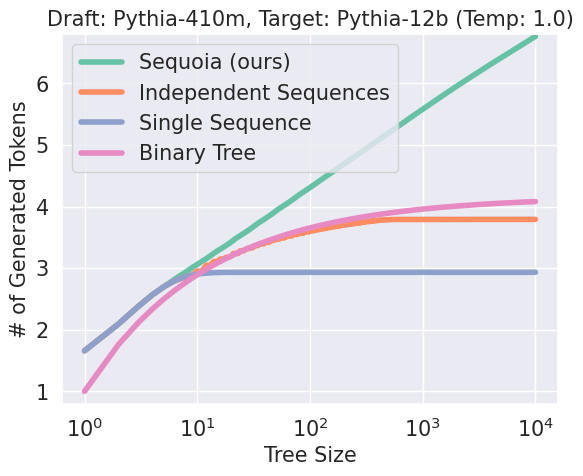

In [29]:
plot_num_accepted(results, draft='EleutherAI/pythia-410m', temp=1.0, include_binary=True, yticks=np.arange(1,7))

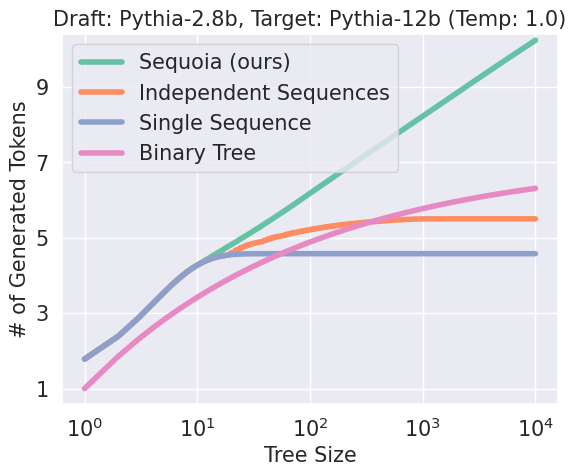

In [30]:
plot_num_accepted(results, draft='EleutherAI/pythia-2.8b', temp=1.0, include_binary=True, yticks=np.array([1, 3, 5, 7, 9]), ylims=[0.6, 10.4])

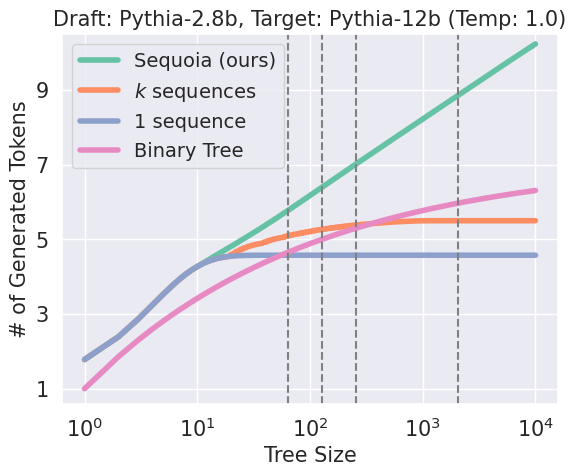

In [55]:
plot_num_accepted(results, draft='EleutherAI/pythia-2.8b', temp=1.0, include_binary=True, yticks=np.array([1, 3, 5, 7, 9]), ylims=[0.6, 10.5], add_vlines=True)

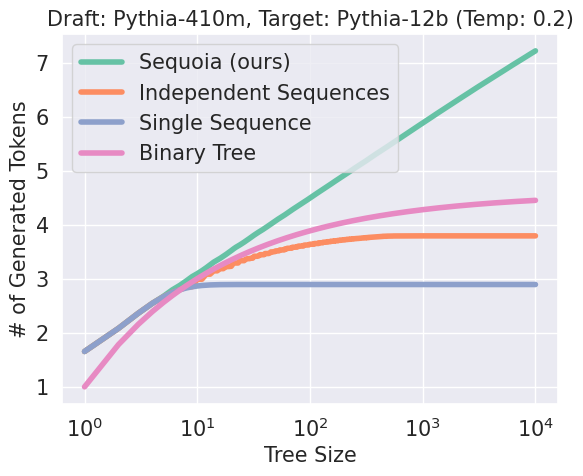

In [32]:
plot_num_accepted(results, draft='EleutherAI/pythia-410m', temp=0.2, include_binary=True)

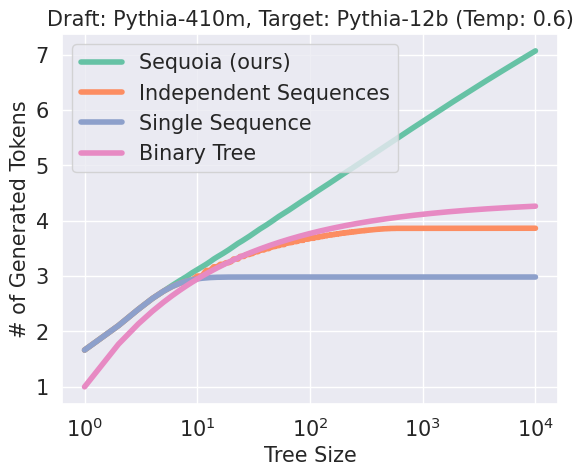

In [33]:
plot_num_accepted(results, draft='EleutherAI/pythia-410m', temp=0.6, include_binary=True)

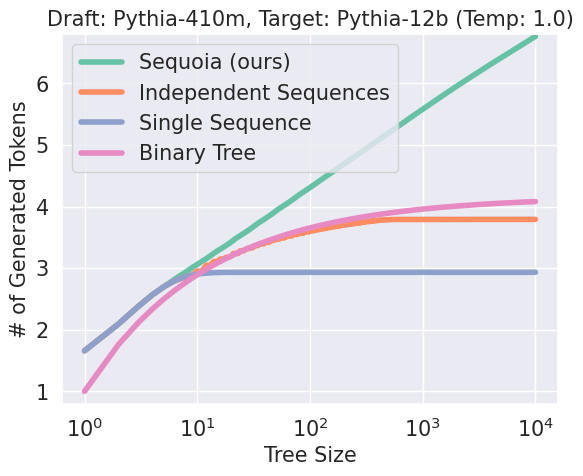

In [34]:
plot_num_accepted(results, draft='EleutherAI/pythia-410m', temp=1.0, include_binary=True, yticks=np.arange(1,7))

# Acceptance rates plots

In [50]:
def plot_acceptance_rates(df, draft, metrics, temp, top_p=1.0, target_only=True, save_fig=True, yticks=None, ylims=None, max_k=512):
  pretty_draft_names = {
      'EleutherAI/pythia-410m': 'Pythia-410m',
      'EleutherAI/pythia-2.8b': 'Pythia-2.8b',
      'llama-7b': 'Llama2-7b',
      'TheBloke/Llama-2-7B-Chat-GPTQ': 'Llama2-7B-Chat',
  }
  target_names = {
      'EleutherAI/pythia-410m': 'Pythia-12b',
      'EleutherAI/pythia-2.8b': 'Pythia-12b',
      'llama-7b': 'Llama2-70b',
      'TheBloke/Llama-2-7B-Chat-GPTQ': 'Llama2-70B-Chat',
  }
  pretty_metric_names = {
      'cover_acceptance_k': 'Top-$k$ Sampling',
      'spectr_acceptance_k': 'SpecTr',
      'specinfer_acceptance_replace_k': 'SpecInfer',
      'specinfer_acceptance_no_replace_k': 'Sequoia (ours)',
  }
  colors = {
      'specinfer_acceptance_no_replace_k': color1,
      'specinfer_acceptance_replace_k': color2,
      'spectr_acceptance_k': color3,
      'cover_acceptance_k': color4,
  }
  _, ax1 = plt.subplots()
  for metric in metrics:
    # alpha = alphas[f'{draft}_{metric}_{temp}'][1:]
    df_1 = df[(df['Metric name'] == metric) & (df['k'] <= max_k) & (df['Draft'] == draft) & (df['Top-p'] == top_p) & (df['Target-only top-p'] == target_only) & (df['Temp'] == temp)]
    pretty_metric = pretty_metric_names[metric]
    ax1.plot(df_1['k'], 1 - df_1['Metric value'], label=pretty_metric, color=colors[metric], linewidth=4)
    # ax1.plot(np.arange(1, len(sequoia) - 1), sequoia[2:], label='Sequoia (ours)', color=color3)
    pretty_draft = pretty_draft_names[draft]
    target = target_names[draft]
    plt.title(f'Draft: {pretty_draft}, Target: {target} (Temp: {temp})', fontsize=15)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(fontsize=15, loc='lower left')
    ax1.set_xlabel('# of Speculated Tokens', fontsize=20)
    ax1.set_ylabel('Rejection Rate', fontsize=20)
    plt.xticks(fontsize=15)
    if yticks is not None:
      ytick_labels = [f'{t:.2f}' for t in yticks]
      # ax1.yticks(ytick_positions, ytick_labels, fontsize=15)
      ax1.set_yticks(yticks, ytick_labels)
      # ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
      ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
      if not ylims:
        ax1.set_ylim(yticks[0]-0.2, yticks[-1] + 0.8)
      else:
        ax1.set_ylim(ylims[0], ylims[1])

  if save_fig:
    plt.savefig(f'/var/cr06_data/avner/results/spec_decoding/figures/robustness_{pretty_draft}_{target}_{temp}.pdf', bbox_inches='tight')
    

In [36]:
metrics= [
    'specinfer_acceptance_no_replace_k',
    'specinfer_acceptance_replace_k',
    'spectr_acceptance_k',
    'cover_acceptance_k',
]

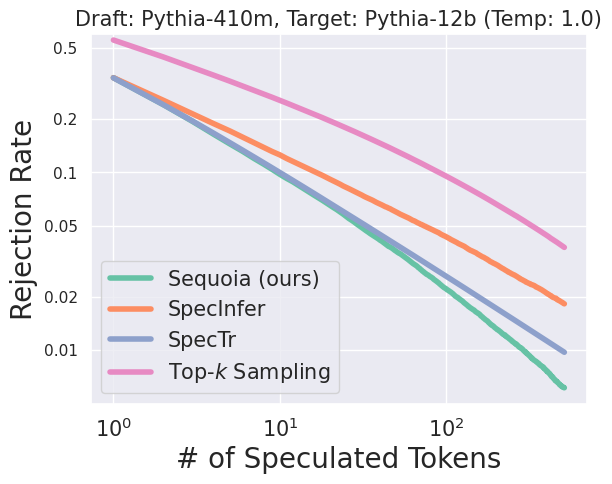

In [51]:
plot_acceptance_rates(df, draft='EleutherAI/pythia-410m', metrics=metrics, temp=1.0, yticks=np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5]), ylims=[0.005, 0.6])

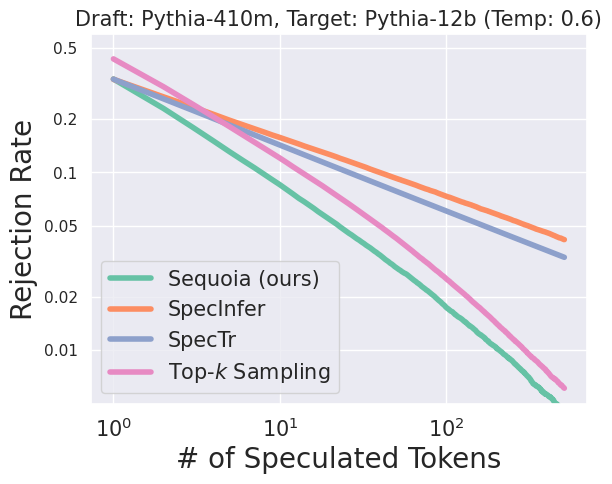

In [52]:
plot_acceptance_rates(df, draft='EleutherAI/pythia-410m', metrics=metrics, temp=0.6, yticks=np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5]), ylims=[0.005, 0.6])

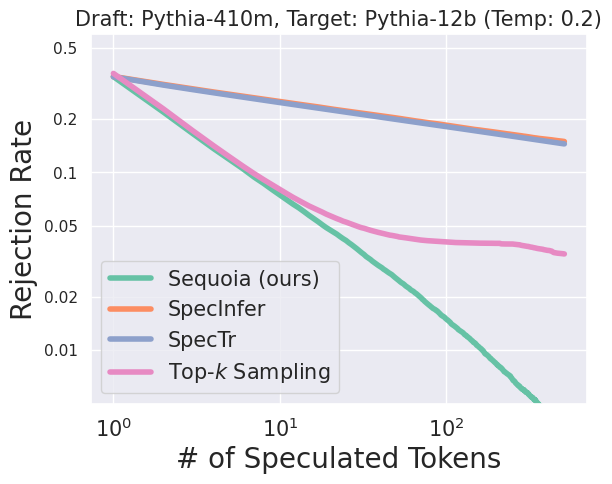

In [53]:
plot_acceptance_rates(df, draft='EleutherAI/pythia-410m', metrics=metrics, temp=0.2, yticks=np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5]), ylims=[0.005, 0.6])

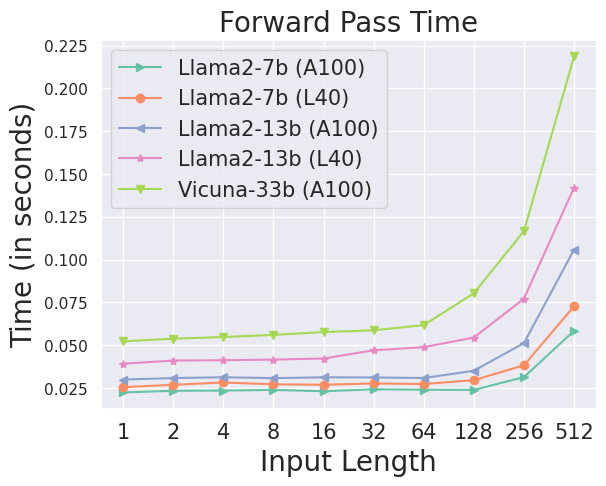

In [16]:
relative_time = False
# Max Length :768, Decode Length :256, Prefix Length :192, inference time:0.03130081462860108s (A100 7B)
# Max Length :768, Decode Length :512, Prefix Length :192, inference time:0.05836149072647095s (A100 7B)
A100_7B = np.array([
    0.022319118976593017,
    0.023287653923034668,
    0.023428711891174316,
    0.02381854772567749,
    0.02301341772079468,
    0.02415174722671509,
    0.023946168422698973,
    0.023796732425689696,
    0.03130081462860108,
    0.05836149072647095,
    ]
)
if relative_time:
  A100_7B = A100_7B / A100_7B[0]

# Max Length :768, Decode Length :256, Prefix Length :192, inference time:0.051166665077209475s(A100 13B)
# Max Length :768, Decode Length :512, Prefix Length :192, inference time:0.10585351037979127s (A100 13B)
A100_13B = np.array([
0.029858779907226563,
0.030724902153015137,
0.031194725036621095,
0.030692288875579832,
0.03115795135498047,
0.031108052730560304,
0.030734169483184814,
0.035007266998291015,
0.051166665077209475,
0.10585351037979127,
]
)
if relative_time:
  A100_13B = A100_13B / A100_13B[0]

# Max Length :768, Decode Length :256, Prefix Length :192, inference time:0.11666619467735291s (A100 33B)
# Max Length :768, Decode Length :512, Prefix Length :192, inference time:0.21870466566085817s (A100 33B)
A100_33B = np.array([
0.05219090700149536,
0.05372469663619995,
0.054725492000579835,
0.0559503173828125,
0.057621080875396725,
0.058620481491088866,
0.061677000522613525,
0.08029029607772827,
0.11666619467735291,
0.21870466566085817,
]
)
if relative_time:
  A100_33B = A100_33B / A100_33B[0]

# Max Length :768, Decode Length :256, Prefix Length :192, inference time:0.038193724632263185s (L40 7B)
# Max Length :768, Decode Length :512, Prefix Length :192, inference time:0.07272305870056152s  (L40 7B)
L40_7B = np.array([0.025389132499694825,
          0.026791603565216066,
          0.02815108060836792,
          0.027077696323394775,
          0.026819372177124025,
          0.027583310604095457,
          0.02725379467010498,
          0.02948847532272339,
          0.038193724632263185,
          0.07272305870056152,
          ]
)
if relative_time:
  L40_7B = L40_7B / L40_7B[0]

# Max Length :768, Decode Length :256, Prefix Length :192, inference time:0.07712893390655517s  (L40 13B)
# Max Length :768, Decode Length :512, Prefix Length :192, inference time:0.14208775758743286s  (L40 13B)
L40_13B = np.array([
0.03912119388580322,
0.04097423076629639,
0.041138229370117185,
0.04153526782989502,
0.04215144872665405,
0.04696519374847412,
0.04878691196441651,
0.05441854238510132,
0.07712893390655517,
0.14208775758743286,
]
)
if relative_time:
  L40_13B = L40_13B / L40_13B[0]

input_length = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
#linear = [(1 - 0.7364 ** (x+1))/(1 - 0.7364) for x in budget]
_, ax1 = plt.subplots()

# n = -1
n = len(input_length)
ax1.plot(input_length[:n], A100_7B[:n], label='Llama2-7b (A100)', c = color1, marker = '>')
ax1.plot(input_length[:n], L40_7B[:n], label='Llama2-7b (L40)', c = color2, marker = 'o')
ax1.plot(input_length[:n], A100_13B[:n], label='Llama2-13b (A100)', c = color3, marker = '<')
ax1.plot(input_length[:n], L40_13B[:n], label='Llama2-13b (L40)', c = color4, marker = '*')
ax1.plot(input_length[:n], A100_33B[:n], label='Vicuna-33b (A100)', c = color5, marker = 'v')
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel('Input Length', fontsize=20)
if relative_time:
  ax1.set_ylabel('$t(n)$', fontsize=20)
else:
  ax1.set_ylabel('Time (in seconds)', fontsize=20)
ax1.set_xticks(input_length[:n], [str(i) for i in input_length[:n]], fontsize=15)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax1.legend(loc='upper left', fontsize=15)

plt.figsize=(0.01,0.01)
# plt.savefig('claim3-1.pdf')
if relative_time:
  plt.title('Relative Forward Pass Time', fontsize=20)
else:
  plt.title('Forward Pass Time', fontsize=20)
if relative_time:
  plt.savefig(f't_n.pdf', bbox_inches='tight')
else:
  plt.savefig(f't_n_unnormalized.pdf', bbox_inches='tight')


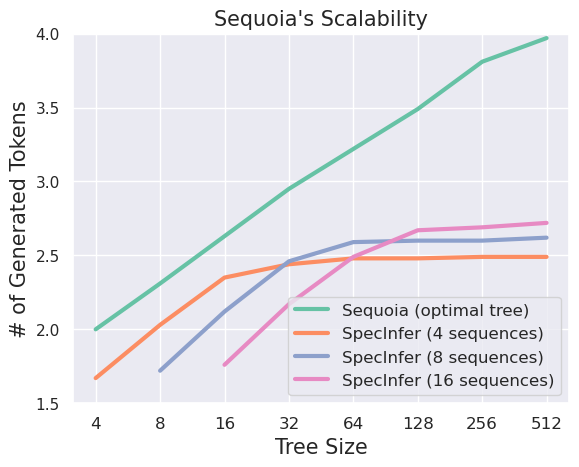

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
sns.set_theme()
_, ax1 = plt.subplots()
budget = [4, 8, 16, 32, 64, 128, 256, 512]
sequoia = [2.00, 2.31, 2.63, 2.95, 3.22, 3.49, 3.81, 3.97]
tree4sequoia = [1.67, 2.03, 2.35, 2.44, 2.48, 2.48, 2.49, 2.49]
tree8sequoia = [1.72, 2.12, 2.46, 2.59, 2.60, 2.60, 2.62]
tree16sequoia = [1.76, 2.17, 2.49, 2.67, 2.69, 2.72]
ax1.plot(budget, sequoia, label='Sequoia (optimal tree)', color=color1, linewidth=3)
ax1.plot(budget, tree4sequoia, label='SpecInfer (4 sequences)', color=color2, linewidth=3)
ax1.plot(budget[1:], tree8sequoia, label='SpecInfer (8 sequences)', color=color3, linewidth=3)
ax1.plot(budget[2:], tree16sequoia, label='SpecInfer (16 sequences)', color=color4, linewidth=3)
plt.title("Sequoia's Scalability", fontsize=15)
ax1.set_xscale('log', base=2)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax1.legend(fontsize=12, loc='lower right')
ax1.set_xlabel('Tree Size', fontsize=15)
ax1.set_ylabel('# of Generated Tokens', fontsize=15)
ax1.set_ylim(1.5, 4.0)
plt.xticks(fontsize=12)
plt.savefig('scalability_e2e.pdf', bbox_inches='tight')


In [38]:
# Speedup ratios.
sequoia = np.array([2.00, 2.31, 2.63, 2.95, 3.22, 3.49, 3.81, 3.97])
k_tree = np.array([
    [1.74, 2.15, 2.50, 2.63, 2.65, 2.68, 2.70, 2.70],
    [1.82, 1.82, 2.24, 2.64, 2.76, 2.80, 2.80, 2.83],
    [1.87, 1.87, 1.87, 2.34, 2.74, 2.89, 2.98, 2.98],
])
sequoia/np.max(k_tree, axis=0)

array([1.06951872, 1.0744186 , 1.052     , 1.11742424, 1.16666667,
       1.20761246, 1.27852349, 1.33221477])

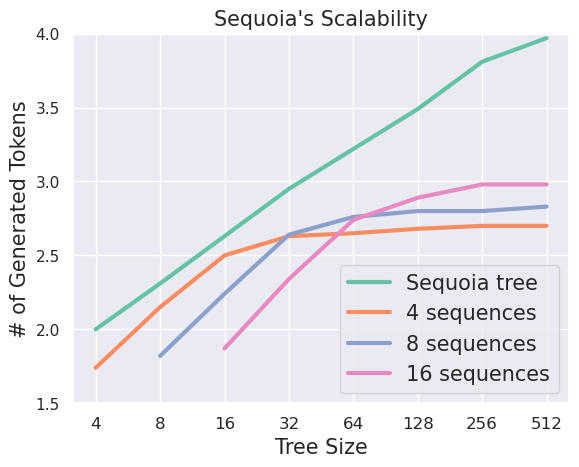

In [42]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
sns.set_theme()
_, ax1 = plt.subplots()
budget = [4, 8, 16, 32, 64, 128, 256, 512]
sequoia = [2.00, 2.31, 2.63, 2.95, 3.22, 3.49, 3.81, 3.97]
tree4sequoia = [1.74, 2.15, 2.50, 2.63, 2.65, 2.68, 2.70, 2.70]
tree8sequoia = [1.82, 2.24, 2.64, 2.76, 2.80, 2.80, 2.83]
tree16sequoia = [1.87, 2.34, 2.74, 2.89, 2.98, 2.98]

# ax1.plot(budget, sequoia, label='Sequoia (optimal tree)', color=color1, linewidth=3)
# ax1.plot(budget, tree4sequoia, label='Sequoia (4 sequences)', color=color2, linewidth=3)
# ax1.plot(budget[1:], tree8sequoia, label='Sequoia (8 sequences)', color=color3, linewidth=3)
# ax1.plot(budget[2:], tree16sequoia, label='Sequoia (16 sequences)', color=color4, linewidth=3)
ax1.plot(budget, sequoia, label='Sequoia tree', color=color1, linewidth=3)
ax1.plot(budget, tree4sequoia, label='4 sequences', color=color2, linewidth=3)
ax1.plot(budget[1:], tree8sequoia, label='8 sequences', color=color3, linewidth=3)
ax1.plot(budget[2:], tree16sequoia, label='16 sequences', color=color4, linewidth=3)
plt.title("Sequoia's Scalability", fontsize=15)
ax1.set_xscale('log', base=2)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax1.legend(fontsize=15, loc='lower right')
ax1.set_xlabel('Tree Size', fontsize=15)
ax1.set_ylabel('# of Generated Tokens', fontsize=15)
ax1.set_ylim(1.5, 4.0)
plt.xticks(fontsize=12)
plt.savefig('sec4_scalability.pdf', bbox_inches='tight')


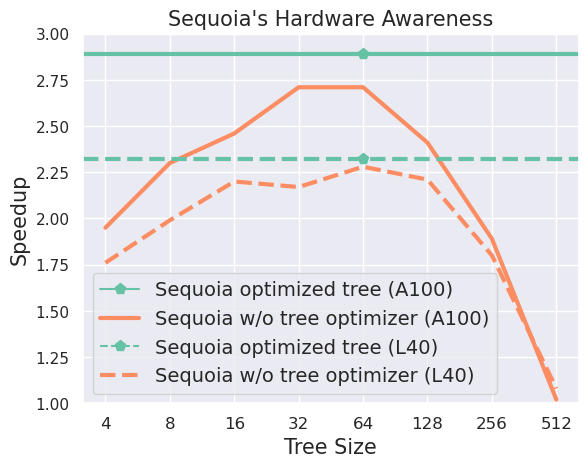

In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
sns.set_theme()
# color1='#8da0cb'
# color2='#fc8d62'
# color3='#66c2a5'
# color4='brown'

# color1 = '#66c2a5'
# color2 = '#fc8d62'
# color3 = '#8da0cb'
# color4 = '#e78ac3'
_, ax1 = plt.subplots()
budget = [4, 8, 16, 32, 64, 128, 256, 512]
sequoia = [1.95, 2.30, 2.46, 2.71, 2.71, 2.41, 1.89, 1.02]
sequoia_L40 = [1.76, 1.99, 2.20, 2.17, 2.28, 2.21, 1.80, 1.08]
sequoia_opt = [2.89]
sequoia_opt_L40 = [2.32]


ax1.plot([64], sequoia_opt, label='Sequoia optimized tree (A100)', marker='p', color=color1, markersize=8)
plt.axhline(2.89, color=color1, linewidth=3)
ax1.plot(budget, sequoia, label='Sequoia w/o tree optimizer (A100)', color=color2, linewidth=3)
ax1.plot([64], sequoia_opt_L40, label='Sequoia optimized tree (L40)', marker='p', color=color1, markersize=8, linestyle='--')
plt.axhline(2.32, color=color1, linewidth=3, linestyle='--')
ax1.plot(budget, sequoia_L40, label='Sequoia w/o tree optimizer (L40)', color=color2, linewidth=3, linestyle='--')
# ax1.plot([64], sequoia_opt_L40, label='Sequoia optimed tree (L40)', marker='x', color=color3, markersize=8)
# plt.axhline(2.32, color=color3, linewidth=3)
# ax1.plot(budget, sequoia_L40, label='Sequoia w/o tree optimizer (L40)', color=color4, linewidth=3)

plt.title("Sequoia's Hardware Awareness", fontsize=15)
ax1.set_xscale('log', base=2)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax1.legend(fontsize=14, loc='lower left')
ax1.set_xlabel('Tree Size', fontsize=15)
ax1.set_ylabel('Speedup', fontsize=15)
ax1.set_ylim(1.0, 3.0)
plt.xticks(fontsize=12)
plt.savefig('sec4_hardware_aware.pdf', bbox_inches='tight')


In [39]:
# Speedup ratios.
print(3.2/1.94)
print(2.69/2.12)
print(2.69/2.12)

1.6494845360824744
1.2688679245283019
1.2688679245283019


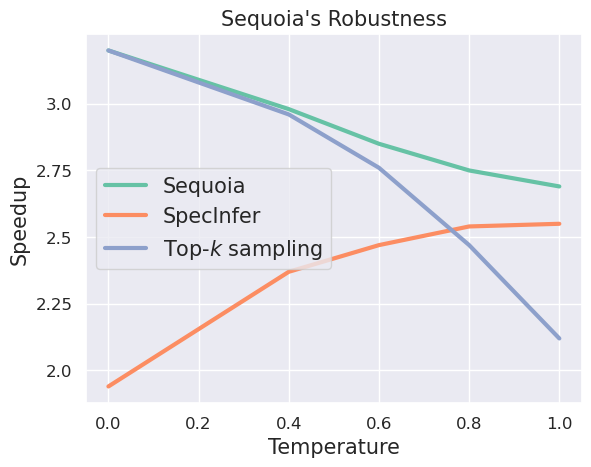

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
sns.set_theme()
_, ax1 = plt.subplots()
temp = [0, 0.4, 0.6, 0.8, 1.0]
sequoia = [3.20, 2.98, 2.85, 2.75, 2.69]
specinfer = [1.94, 2.37, 2.47, 2.54, 2.55]
topk = [3.20, 2.96, 2.76, 2.47, 2.12]

ax1.plot(temp, sequoia, '-', label='Sequoia', color=color1, linewidth=3)
ax1.plot(temp, specinfer, '-', label='SpecInfer', color=color2, linewidth=3)
ax1.plot(temp, topk, '-', label='Top-$k$ sampling', color=color3, linewidth=3)

plt.title("Sequoia's Robustness", fontsize=15)
# ax1.set_xscale('log', base=2)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax1.legend(fontsize=15, loc='center left')
ax1.set_xlabel('Temperature', fontsize=15)
ax1.set_ylabel('Speedup', fontsize=15)
# ax1.set_ylim(1.0, 3.0)
temp = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.xticks(temp, [str(t) for t in temp], fontsize=12)
yticks = [2.0, 2.25, 2.5, 2.75, 3.0]
plt.yticks(yticks, [str(y) for y in yticks], fontsize=12)
plt.savefig('sec4_robustness.pdf', bbox_inches='tight')


In [43]:
print(3.26/3.16)
print(3.26/2.51)
print(2.37/2.09)
print(2.37/1.72)

1.0316455696202531
1.298804780876494
1.1339712918660287
1.377906976744186
